Grupo "Bayesiann"  
Jose Ignacio Ríos Villanueva  
Saul Enrique Quiroz Castillo  
Marco Antonio Villarroel Peña

# **CARGA DE DATOS**

In [ ]:
# Importar e instalar librerías
!sudo apt-get update -y
!sudo apt-get install python3.10 python3.10-distutils -y
!curl -sS https://bootstrap.pypa.io/get-pip.py | python3.10



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler



# Cargar dataset desde GitHub
direct_download_url = 'https://raw.githubusercontent.com/marcogerenssa-stack/Modelo_predictivo_abandono_escolar/3891719d65eebd9f292a0aeeed2dfe799d4c3824/Base_abandono_escolar.xlsx'

try:
    df = pd.read_excel(direct_download_url)
    print("Dataset cargado correctamente desde el enlace de descarga directa.")
    display(df.head())
except Exception as e:
    print(f"Error al cargar el archivo desde el enlace de descarga directa: {e}")
    print("Por favor, verifica que el enlace sea una URL de descarga directa válida para un archivo Excel.")

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:6 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:7 https://cli.github.com/packages stable InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:12 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 Packages [38.5 kB]
Get:13 https://developer.download.nvidia.com/compute/cuda/repos/ubun

,id,estrato,anio_nac,lugar_nac,npioc,nivel,curso,asiste,abandono_1erhijo,edad_1erhijo,...,niv_ed,niv_ed_g,aestudio,Sexo,Edad_actual,Mayor_18<12aestudio,De18<11aestudio,De17<10aestudio,Abandono(1),Abandono
0,112-000389-A-013111,112,1981,2,2,12.0,8.0,NaN,3.0,28.0,...,5,3,17,1,42,0,0,0,0,0
1,112-000389-A-015111,112,1980,1,2,12.0,8.0,NaN,3.0,34.0,...,5,3,17,1,43,0,0,0,0,0
2,112-000385-A-012111,112,1972,2,2,6.0,4.0,NaN,NaN,NaN,...,4,2,12,1,51,0,0,0,0,0
3,112-000385-A-022111,112,1998,1,1,14.0,2.0,NaN,NaN,NaN,...,5,3,14,1,25,0,0,0,0,0
4,142-003969-D-048111,122,1969,1,1,NaN,NaN,NaN,3.0,20.0,...,0,0,0,1,54,1,0,0,1,1


# **LIMPIEZA E INGENIERÍA DE VARIABLES**

In [ ]:
!pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 44.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 78.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 40.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [imblearn]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20423 entries, 0 to 20422
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   20423 non-null  object 
 1   estrato              20423 non-null  int64  
 2   anio_nac             20423 non-null  int64  
 3   lugar_nac            20423 non-null  int64  
 4   npioc                20423 non-null  int64  
 5   nivel                20140 non-null  float64
 6   curso                20140 non-null  float64
 7   asiste               7326 non-null   float64
 8   abandono_1erhijo     11983 non-null  float64
 9   edad_1erhijo         3847 non-null   float64
 10  edad_ias             13772 non-null  float64
 11  agre_padres          20369 non-null  float64
 12  vs08_0841_A          3592 non-null   float64
 13  vs08_0841_B          9764 non-null   float64
 14  vs08_0841_C          4276 non-null   float64
 15  vs08_0841_D          965 non-null   

In [ ]:
# Crear la variable "viol_ninez" que expresa si la persona sufrió alguna violencia durante la niñez (1 si sufrió, 0 si no sufrió)

all_violence_columns = ['vs08_0841_A', 'vs08_0841_B', 'vs08_0841_C', 'vs08_0841_D', 'vs08_0841_E', 'vs08_0841_F', 'vs08_0841_G', 'vs08_0841_H', 'vs08_0841_I', 'vs08_0841_J', 'vs08_0841_K', 'vs08_0841_L', 'vs08_0841_M', 'vs08_0841_N', 'vs08_0841_X', 'vs08_0841_Y']

# Filtrar las columnas que realmente existen en el DataFrame
columns_to_sum = [col for col in all_violence_columns if col in df.columns]

# Calcular la suma de las columnas de violencia, tratando NaN como 0 para la suma
df['viol_ninez_sum'] = df[columns_to_sum].sum(axis=1, skipna=True)

# Crear la variable binaria 'viol_ninez': 1 si la suma es > 0, 0 en caso contrario
df['viol_ninez'] = (df['viol_ninez_sum'] > 0).astype(int)

# Eliminar la columna temporal de suma
df = df.drop(columns=['viol_ninez_sum'])

display(df[['viol_ninez']].head())

,viol_ninez
0,1
1,1
2,0
3,0
4,1


In [ ]:
# Crear variable "lengua_originaria" de "idiomaninez"

df['lengua_originaria'] = df['idiomaninez'].apply(lambda x: 1 if x in [1, 2] else 0)
display(df[['idiomaninez', 'lengua_originaria']].head())

,idiomaninez,lengua_originaria
0,3,0
1,3,0
2,3,0
3,1,1
4,1,1


In [ ]:
# Crear la variable "migracion" de "lugar_nac"

df['migracion'] = df['lugar_nac'].apply(lambda x: 1 if x in [2, 3] else 0)
display(df[['lugar_nac', 'migracion']].head())

,lugar_nac,migracion
0,2,1
1,1,0
2,2,1
3,1,0
4,1,0


In [ ]:
# Dicotomizar variable "npioc"

df['npioc'] = df['npioc'].replace([2, 3], 0)
display(df[['npioc']].head())

,npioc
0,0
1,0
2,0
3,1
4,1


In [ ]:
# Dicotomizar variable "agre_padres"
import numpy as np # Import numpy to handle NaN

# Reemplazar los valores 2, 3, 8, 999 y NaN con 0
df['agre_padres'] = df['agre_padres'].replace([2, 3, 8, 999, np.nan], 0)
display(df[['agre_padres']].head())

,agre_padres
0,0.0
1,0.0
2,1.0
3,0.0
4,1.0


In [ ]:
# Crear la variable "rural" de "area"

df['rural'] = df['area'].apply(lambda x: 1 if x in [2] else 0)
display(df[['area', 'rural']].head())

,area,rural
0,1,0
1,1,0
2,1,0
3,1,0
4,2,1


In [ ]:
# Crear las variables "altiplano", "valles" y "llanos" de "region"

df['altiplano'] = df['region'].apply(lambda x: 1 if x == 1 else 0)
df['valles'] = df['region'].apply(lambda x: 1 if x == 2 else 0)
df['llanos'] = df['region'].apply(lambda x: 1 if x == 3 else 0)
display(df[['region', 'altiplano', 'valles', 'llanos']].head())

,region,altiplano,valles,llanos
0,2,0,1,0
1,2,0,1,0
2,2,0,1,0
3,2,0,1,0
4,2,0,1,0


In [ ]:
# Crear las variables "hombre" y "mujer" de "sexo"

df['hombre'] = df['Sexo'].apply(lambda x: 1 if x == 1 else 0)
df['mujer'] = df['Sexo'].apply(lambda x: 1 if x == 2 else 0)
display(df[['Sexo', 'hombre', 'mujer']].head())

,Sexo,hombre,mujer
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0


In [ ]:
# Dicotomizar variable "edad_1erhijo": 1 si es 17 o menos, 0 si es mayor a 17, y valores perdidos se marcan con 0

df['1erhijo_<17'] = df['edad_1erhijo'].apply(lambda x: 1 if x <= 17 else 0)

display(df[['edad_1erhijo', '1erhijo_<17']].head())

,edad_1erhijo,1erhijo_<17
0,28.0,0
1,34.0,0
2,NaN,0
3,NaN,0
4,20.0,0


In [ ]:
# Dicotomizar variable "edad_ias": 1 si es 17 o menos, 0 si es mayor a 17, y valores perdidos se marcan con 0

df['ias_<17'] = df['edad_ias'].apply(lambda x: 1 if x <= 17 else 0)

display(df[['edad_ias', 'ias_<17']].head())

,edad_ias,ias_<17
0,NaN,0
1,NaN,0
2,NaN,0
3,16.0,1
4,NaN,0


In [ ]:
# Eliminar atributos que no serán necesarios para los modelos

columns_to_drop = ['estrato', 'edad_1erhijo', 'edad_ias', 'vs08_0841_A', 'vs08_0841_B', 'vs08_0841_C', 'vs08_0841_D', 'vs08_0841_E', 'vs08_0841_F', 'vs08_0841_G', 'vs08_0841_H', 'vs08_0841_I', 'vs08_0841_J', 'vs08_0841_K', 'vs08_0841_L', 'vs08_0841_M', 'vs08_0841_N', 'vs08_0841_X', 'vs08_0841_Y', 'vs08_0841_X_cod', 'id', 'niv_ed', 'niv_ed_g', 'aestudio', 'Edad_actual', 'Mayor_18<12aestudio', 'De18<11aestudio', 'De17<10aestudio', 'Abandono(1)', 'asiste', 'curso', 'nivel', 'anio_nac', 'lugar_nac', 'area', 'idiomaninez', 'region', 'Sexo', 'abandono_1erhijo']
df = df.drop(columns=columns_to_drop)
display(df.head())

,npioc,agre_padres,Abandono,viol_ninez,lengua_originaria,migracion,rural,altiplano,valles,llanos,hombre,mujer,1erhijo_<17,ias_<17
0,0,0.0,0,1,0,1,0,0,1,0,1,0,0,0
1,0,0.0,0,1,0,0,0,0,1,0,1,0,0,0
2,0,1.0,0,0,0,1,0,0,1,0,1,0,0,0
3,1,0.0,0,0,1,0,0,0,1,0,1,0,0,1
4,1,1.0,1,1,1,0,1,0,1,0,1,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20423 entries, 0 to 20422
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   npioc              20423 non-null  int64  
 1   agre_padres        20423 non-null  float64
 2   Abandono           20423 non-null  int64  
 3   viol_ninez         20423 non-null  int64  
 4   lengua_originaria  20423 non-null  int64  
 5   migracion          20423 non-null  int64  
 6   rural              20423 non-null  int64  
 7   altiplano          20423 non-null  int64  
 8   valles             20423 non-null  int64  
 9   llanos             20423 non-null  int64  
 10  hombre             20423 non-null  int64  
 11  mujer              20423 non-null  int64  
 12  1erhijo_<17        20423 non-null  int64  
 13  ias_<17            20423 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 2.2 MB


In [ ]:
# Frecuencias simples para variables categóricas/discretas (ajusta las columnas según sea necesario)
for col in ['estrato', 'npioc', 'agre_padres', 'Abandono', 'lengua_originaria', 'migracion', 'rural', 'altiplano', 'valles', 'llanos', 'hombre', 'mujer']:
    if col in df.columns:
        print(f"Frecuencias para la columna: {col}")
        display(df[col].value_counts())
        print("\n" + "="*30 + "\n")

# Estadísticos descriptivos para variables numéricas
print("Estadísticos descriptivos para las variables numéricas:")
display(df.describe())

Frecuencias para la columna: npioc


,count
npioc,
0,16089
1,4334




Frecuencias para la columna: agre_padres


,count
agre_padres,
0.0,14468
1.0,5955




Frecuencias para la columna: Abandono


,count
Abandono,
0,14937
1,5486




Frecuencias para la columna: lengua_originaria


,count
lengua_originaria,
0,16131
1,4292




Frecuencias para la columna: migracion


,count
migracion,
0,15211
1,5212




Frecuencias para la columna: rural


,count
rural,
0,14737
1,5686




Frecuencias para la columna: altiplano


,count
altiplano,
0,12543
1,7880




Frecuencias para la columna: valles


,count
valles,
0,14329
1,6094




Frecuencias para la columna: llanos


,count
llanos,
0,13974
1,6449




Frecuencias para la columna: hombre


,count
hombre,
0,14545
1,5878




Frecuencias para la columna: mujer


,count
mujer,
1,14545
0,5878




Estadísticos descriptivos para las variables numéricas:


,npioc,agre_padres,Abandono,viol_ninez,lengua_originaria,migracion,rural,altiplano,valles,llanos,hombre,mujer,1erhijo_<17,ias_<17
count,20423.000000,20423.000000,20423.000000,20423.000000,20423.000000,20423.000000,20423.000000,20423.000000,20423.000000,20423.000000,20423.000000,20423.000000,20423.000000,20423.000000
mean,0.212212,0.291583,0.268619,0.879988,0.210155,0.255202,0.278412,0.385839,0.298389,0.315771,0.287813,0.712187,0.014102,0.290506
std,0.408884,0.454502,0.443252,0.324983,0.407429,0.435986,0.448228,0.486805,0.457562,0.464834,0.452754,0.452754,0.117913,0.454007
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Correlaciones con la variable 'Abandono':


,Abandono
Abandono,1.000000
lengua_originaria,0.329464
rural,0.255246
npioc,0.175294
ias_<17,0.170398
viol_ninez,0.104149
1erhijo_<17,0.099908
agre_padres,0.096343
migracion,0.093235
hombre,0.065650


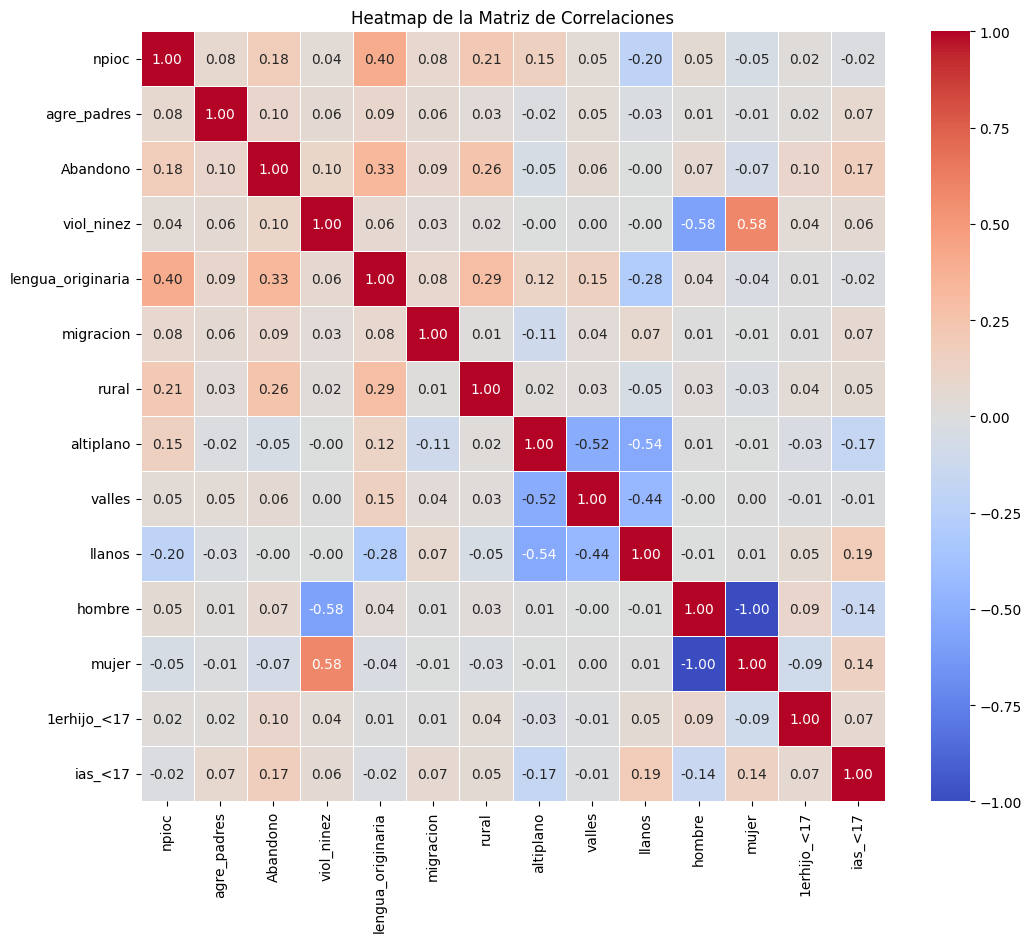

In [ ]:
# Mostrar las correlaciones respecto a la variable 'Abandono'
correlation_matrix = df.corr()

print("Correlaciones con la variable 'Abandono':")
display(correlation_matrix['Abandono'].sort_values(ascending=False))

# Aumentar el tamaño de la figura para mejor visualización
plt.figure(figsize=(12, 10))

# Crear el heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Añadir título
plt.title('Heatmap de la Matriz de Correlaciones')

# Mostrar la gráfica
plt.show()

# **PREPROCESAMIENTO**

In [ ]:
X = df.drop('Abandono', axis=1)
y = df['Abandono']
display(X.head())
display(y.head())

,npioc,agre_padres,viol_ninez,lengua_originaria,migracion,rural,altiplano,valles,llanos,hombre,mujer,1erhijo_<17,ias_<17
0,0,0.0,1,0,1,0,0,1,0,1,0,0,0
1,0,0.0,1,0,0,0,0,1,0,1,0,0,0
2,0,1.0,0,0,1,0,0,1,0,1,0,0,0
3,1,0.0,0,1,0,0,0,1,0,1,0,0,1
4,1,1.0,1,1,0,1,0,1,0,1,0,0,0


,Abandono
0,0
1,0
2,0
3,0
4,1


In [ ]:
# Dividir en entrenamiento y test (por ejemplo, 80% entrenamiento, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Dividir el conjunto de entrenamiento en entrenamiento y validación (por ejemplo, 80% entrenamiento, 20% validación del conjunto original, que es 16% del total)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train) # 0.25 * 0.8 = 0.2

print("Dimensiones de los conjuntos:")
print("Conjunto de Entrenamiento:", X_train.shape, y_train.shape)
print("Conjunto de Validación:", X_val.shape, y_val.shape)
print("Conjunto de Prueba:", X_test.shape, y_test.shape)

Dimensiones de los conjuntos:
Conjunto de Entrenamiento: (12253, 13) (12253,)
Conjunto de Validación: (4085, 13) (4085,)
Conjunto de Prueba: (4085, 13) (4085,)


In [ ]:
# Equilibramos clases en el conjunto de entrenamiento empleando "Undersampling"
# Inicializar el RandomUnderSampler
# random_state para reproducibilidad

rus = RandomUnderSampler(random_state=42)

# Aplicar undersampling solo al conjunto de entrenamiento
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)

print("Conjunto de entrenamiento después de Undersampling:")
print("Dimensiones de X_train_undersampled:", X_train_undersampled.shape)
print("Dimensiones de y_train_undersampled:", y_train_undersampled.shape)
print("\nDistribución de clases en el conjunto de entrenamiento después de Undersampling:")
display(y_train_undersampled.value_counts())

Conjunto de entrenamiento después de Undersampling:
Dimensiones de X_train_undersampled: (6584, 13)
Dimensiones de y_train_undersampled: (6584,)

Distribución de clases en el conjunto de entrenamiento después de Undersampling:


,count
Abandono,
0,3292
1,3292


In [ ]:
# Identificar columnas numéricas para escalado
numeric_cols = X_train_undersampled.select_dtypes(include=['int64', 'float64']).columns

# Ahora procedemos con el escalado, aplicándolo a los datos
# Creamos un nuevo escalador ajustado a los datos undersampled
scaler_undersampled = StandardScaler()

# Ajustar el escalador solo en el conjunto de entrenamiento balanceado
scaler_undersampled.fit(X_train_undersampled[numeric_cols])

# Transformar el conjunto de entrenamiento balanceado
X_train_undersampled_scaled = scaler_undersampled.transform(X_train_undersampled[numeric_cols])

# Transformar los conjuntos de validación y prueba
X_val_scaled_after_undersample = scaler_undersampled.transform(X_val[numeric_cols])
X_test_scaled_after_undersample = scaler_undersampled.transform(X_test[numeric_cols])


print("Primeras filas del conjunto de entrenamiento balanceado y escalado (para Regresión Logística):")
display(pd.DataFrame(X_train_undersampled_scaled, columns=numeric_cols).head())

print("\nPrimeras filas del conjunto de entrenamiento balanceado (para Árbol de Decisiones):")
display(X_train_undersampled.head())

print("\nPrimeras filas del conjunto de validación escalado:")
display(pd.DataFrame(X_val_scaled_after_undersample, columns=numeric_cols).head())

print("\nPrimeras filas del conjunto de prueba escalado:")
display(pd.DataFrame(X_test_scaled_after_undersample, columns=numeric_cols).head())

print("\nPrimeras filas del conjunto de validación original:")
display(X_val.head())

print("\nPrimeras filas del conjunto de prueba original:")
display(X_test.head())

Primeras filas del conjunto de entrenamiento balanceado y escalado (para Regresión Logística):


,npioc,agre_padres,viol_ninez,lengua_originaria,migracion,rural,altiplano,valles,llanos,hombre,mujer,1erhijo_<17,ias_<17
0,-0.581793,-0.682674,0.339932,-0.620669,-0.608473,-0.723199,-0.775852,1.489819,-0.675988,-0.651530,0.651530,-0.137403,-0.706946
1,-0.581793,-0.682674,-2.941761,-0.620669,-0.608473,-0.723199,-0.775852,-0.671223,1.479317,1.534848,-1.534848,-0.137403,-0.706946
2,-0.581793,-0.682674,0.339932,-0.620669,-0.608473,-0.723199,-0.775852,-0.671223,1.479317,-0.651530,0.651530,-0.137403,1.414536
3,-0.581793,-0.682674,0.339932,1.611164,-0.608473,1.382746,1.288905,-0.671223,-0.675988,-0.651530,0.651530,-0.137403,1.414536
4,-0.581793,-0.682674,0.339932,-0.620669,-0.608473,-0.723199,1.288905,-0.671223,-0.675988,-0.651530,0.651530,-0.137403,-0.706946



Primeras filas del conjunto de entrenamiento balanceado (para Árbol de Decisiones):


,npioc,agre_padres,viol_ninez,lengua_originaria,migracion,rural,altiplano,valles,llanos,hombre,mujer,1erhijo_<17,ias_<17
11554,0,0.0,1,0,0,0,0,1,0,0,1,0,0
5041,0,0.0,0,0,0,0,0,0,1,1,0,0,0
17650,0,0.0,1,0,0,0,0,0,1,0,1,0,1
13385,0,0.0,1,1,0,1,1,0,0,0,1,0,1
14004,0,0.0,1,0,0,0,1,0,0,0,1,0,0



Primeras filas del conjunto de validación escalado:


,npioc,agre_padres,viol_ninez,lengua_originaria,migracion,rural,altiplano,valles,llanos,hombre,mujer,1erhijo_<17,ias_<17
0,-0.581793,1.464829,0.339932,-0.620669,-0.608473,1.382746,-0.775852,1.489819,-0.675988,-0.65153,0.65153,-0.137403,-0.706946
1,-0.581793,-0.682674,0.339932,1.611164,-0.608473,1.382746,1.288905,-0.671223,-0.675988,-0.65153,0.65153,-0.137403,-0.706946
2,-0.581793,1.464829,0.339932,1.611164,1.643458,-0.723199,1.288905,-0.671223,-0.675988,-0.65153,0.65153,-0.137403,1.414536
3,-0.581793,-0.682674,0.339932,-0.620669,-0.608473,-0.723199,-0.775852,-0.671223,1.479317,-0.65153,0.65153,-0.137403,-0.706946
4,-0.581793,-0.682674,0.339932,-0.620669,-0.608473,-0.723199,1.288905,-0.671223,-0.675988,-0.65153,0.65153,-0.137403,-0.706946



Primeras filas del conjunto de prueba escalado:


,npioc,agre_padres,viol_ninez,lengua_originaria,migracion,rural,altiplano,valles,llanos,hombre,mujer,1erhijo_<17,ias_<17
0,-0.581793,-0.682674,0.339932,-0.620669,1.643458,-0.723199,-0.775852,1.489819,-0.675988,-0.651530,0.651530,-0.137403,-0.706946
1,-0.581793,-0.682674,0.339932,-0.620669,-0.608473,-0.723199,1.288905,-0.671223,-0.675988,-0.651530,0.651530,-0.137403,1.414536
2,-0.581793,-0.682674,0.339932,-0.620669,-0.608473,-0.723199,-0.775852,1.489819,-0.675988,-0.651530,0.651530,-0.137403,-0.706946
3,-0.581793,-0.682674,-2.941761,-0.620669,-0.608473,-0.723199,-0.775852,-0.671223,1.479317,1.534848,-1.534848,-0.137403,1.414536
4,-0.581793,1.464829,0.339932,-0.620669,-0.608473,-0.723199,1.288905,-0.671223,-0.675988,-0.651530,0.651530,-0.137403,-0.706946



Primeras filas del conjunto de validación original:


,npioc,agre_padres,viol_ninez,lengua_originaria,migracion,rural,altiplano,valles,llanos,hombre,mujer,1erhijo_<17,ias_<17
15449,0,1.0,1,0,0,1,0,1,0,0,1,0,0
13498,0,0.0,1,1,0,1,1,0,0,0,1,0,0
6704,0,1.0,1,1,1,0,1,0,0,0,1,0,1
17823,0,0.0,1,0,0,0,0,0,1,0,1,0,0
8003,0,0.0,1,0,0,0,1,0,0,0,1,0,0



Primeras filas del conjunto de prueba original:


,npioc,agre_padres,viol_ninez,lengua_originaria,migracion,rural,altiplano,valles,llanos,hombre,mujer,1erhijo_<17,ias_<17
10356,0,0.0,1,0,1,0,0,1,0,0,1,0,0
13798,0,0.0,1,0,0,0,1,0,0,0,1,0,1
14901,0,0.0,1,0,0,0,0,1,0,0,1,0,0
4720,0,0.0,0,0,0,0,0,0,1,1,0,0,1
6558,0,1.0,1,0,0,0,1,0,0,0,1,0,0


# **REGRESIÓN LOGÍSTICA**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Inicializar el modelo de Regresión Logística
model_lr_undersampled = LogisticRegression(random_state=42)

# Entrenar el modelo con los datos de entrenamiento balanceados y escalados
# Usamos X_train_undersampled_scaled y y_train_undersampled
model_lr_undersampled.fit(X_train_undersampled_scaled, y_train_undersampled)

print("Modelo de Regresión Logística (con undersampling) entrenado con éxito.")

Modelo de Regresión Logística (con undersampling) entrenado con éxito.


In [ ]:
# Definir el espacio de hiperparámetros para la búsqueda
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['liblinear', 'saga']
}

# Inicializar el modelo de Regresión Logística
logistic_regression = LogisticRegression(random_state=42)

# Inicializar GridSearchCV
# cv=5 para 5-fold cross-validation en el conjunto de entrenamiento balanceado y escalado
grid_search_lr_undersampled = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Ajustar el GridSearchCV a los datos de entrenamiento balanceados y escalados
# Usamos X_train_undersampled_scaled y y_train_undersampled
print("Realizando búsqueda de hiperparámetros para Regresión Logística en el conjunto de entrenamiento balanceado...")
grid_search_lr_undersampled.fit(X_train_undersampled_scaled, y_train_undersampled)

# Mostrar los mejores hiperparámetros encontrados
print("\nMejores hiperparámetros para Regresión Logística (con undersampling):", grid_search_lr_undersampled.best_params_)

# Mostrar la mejor puntuación de validación cruzada
print("Mejor puntuación de validación cruzada (con undersampling):", grid_search_lr_undersampled.best_score_)

# Evaluar el mejor modelo encontrado en el conjunto de validación
# Usamos X_val_scaled_after_undersample
best_model_lr_undersampled = grid_search_lr_undersampled.best_estimator_
y_val_pred_lr_undersampled = best_model_lr_undersampled.predict(X_val_scaled_after_undersample)

print("\nEvaluación del mejor modelo de Regresión Logística (con undersampling) en el conjunto de VALIDACIÓN (imputado y escalado):")
print("Accuracy:", accuracy_score(y_val, y_val_pred_lr_undersampled))
print("Classification Report:\n", classification_report(y_val, y_val_pred_lr_undersampled))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_lr_undersampled))

Realizando búsqueda de hiperparámetros para Regresión Logística en el conjunto de entrenamiento balanceado...

Mejores hiperparámetros para Regresión Logística (con undersampling): {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
Mejor puntuación de validación cruzada (con undersampling): 0.7130941418393558

Evaluación del mejor modelo de Regresión Logística (con undersampling) en el conjunto de VALIDACIÓN (imputado y escalado):
Accuracy: 0.7223990208078336
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.73      0.79      2988
           1       0.49      0.70      0.57      1097

    accuracy                           0.72      4085
   macro avg       0.68      0.71      0.68      4085
weighted avg       0.77      0.72      0.73      4085

Confusion Matrix:
 [[2188  800]
 [ 334  763]]


In [ ]:
# Evaluar el mejor modelo de Regresión Logística (con undersampling) en el conjunto de prueba
# Usamos best_model_lr_undersampled y X_test_scaled_after_undersample
y_test_pred_lr_undersampled = best_model_lr_undersampled.predict(X_test_scaled_after_undersample)

print("\nEvaluación del mejor modelo de Regresión Logística (con undersampling) en el conjunto de prueba:")
print("Accuracy:", accuracy_score(y_test, y_test_pred_lr_undersampled))
print("Classification Report:\n", classification_report(y_test, y_test_pred_lr_undersampled))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_lr_undersampled))

# Guardar las métricas de evaluación en un archivo de texto
with open("evaluacion_regresion_logistica.txt", "w") as f:
    f.write("Evaluación del mejor modelo de Regresión Logística (con undersampling) en el conjunto de prueba:\n")
    f.write(f"Accuracy: {accuracy_score(y_test, y_test_pred_lr_undersampled):.4f}\n")
    f.write("Classification Report:\n")
    f.write(classification_report(y_test, y_test_pred_lr_undersampled))
    f.write("\nConfusion Matrix:\n")
    f.write(str(confusion_matrix(y_test, y_test_pred_lr_undersampled)))

print("\nLas métricas de evaluación del modelo de Regresión Logística han sido exportadas a 'evaluacion_regresion_logistica.txt'")


Evaluación del mejor modelo de Regresión Logística (con undersampling) en el conjunto de prueba:
Accuracy: 0.7238678090575276
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.74      0.80      2988
           1       0.49      0.69      0.57      1097

    accuracy                           0.72      4085
   macro avg       0.68      0.71      0.68      4085
weighted avg       0.76      0.72      0.74      4085

Confusion Matrix:
 [[2201  787]
 [ 341  756]]

Las métricas de evaluación del modelo de Regresión Logística han sido exportadas a 'evaluacion_regresion_logistica.txt'


In [ ]:
# Obtener los coeficientes del modelo (entrenado con undersampling) y los nombres de las características
coefficients = best_model_lr_undersampled.coef_[0]

# Usamos los nombres de las columnas del conjunto de entrenamiento balanceado
feature_names = X_train_undersampled.columns

# Crear un DataFrame para visualizar los coeficientes
coefficients_df = pd.DataFrame({'Atributo': feature_names, 'Coeficiente': coefficients})

# Ordenar los coeficientes para ver los más influyentes
coefficients_df = coefficients_df.sort_values(by='Coeficiente', ascending=False)

print("\nCoeficientes del Modelo de Regresión Logística (con undersampling):")
display(coefficients_df)

# Interpretación básica:
print("\nInterpretación de los Coeficientes:")
print("Un coeficiente positivo indica que a medida que el valor del atributo aumenta, la probabilidad de 'Abandono' aumenta también.")
print("Un coeficiente negativo indica que a medida que el valor del atributo aumenta, la probabilidad de 'Abandono' disminuye.")
print("La magnitud del coeficiente indica la fuerza de la relación (manteniendo otras variables constantes).")


Coeficientes del Modelo de Regresión Logística (con undersampling):


,Atributo,Coeficiente
3,lengua_originaria,0.624016
12,ias_<17,0.413044
5,rural,0.392986
2,viol_ninez,0.379671
9,hombre,0.192773
1,agre_padres,0.135752
4,migracion,0.117302
11,1erhijo_<17,0.113821
8,llanos,0.085032
0,npioc,0.060004



Interpretación de los Coeficientes:
Un coeficiente positivo indica que a medida que el valor del atributo aumenta, la probabilidad de 'Abandono' aumenta también.
Un coeficiente negativo indica que a medida que el valor del atributo aumenta, la probabilidad de 'Abandono' disminuye.
La magnitud del coeficiente indica la fuerza de la relación (manteniendo otras variables constantes).


## **REGRESIÓN LOGÍSTICA - MODELO PREDICTIVO**

In [ ]:
def predict_abandonment_probability_lr_undersampled(feature_values, model, scaler, feature_names):

    # Crear un DataFrame con los valores de entrada en el orden correcto de los atributos
    input_df = pd.DataFrame([feature_values], columns=feature_names)

    # Preprocesar los valores de entrada de la misma manera que los datos de entrenamiento balanceados
    # Identificar columnas numéricas
    numeric_cols = input_df.select_dtypes(include=['int64', 'float64']).columns

    # Escalar características numéricas
    try:
         # Usar el escalador ajustado en los datos undersampled
        input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    except ValueError as e:
        print(f"Error durante el escalado: {e}")
        print("Asegúrate de que todas las columnas numéricas esperadas estén en feature_values.")
        return None

    # Realizar la predicción de probabilidad
    # predict_proba devuelve las probabilidades para cada clase (clase 0, clase 1)
    # Queremos la probabilidad de la clase 1 (Abandono)
    probabilities = model.predict_proba(input_df)

    # Devolver la probabilidad de la clase positiva (índice 1)
    return probabilities[0][1]

# --- Ejemplo de uso ---
example_feature_values_new_person = {
    'npioc': 0,
    'agre_padres': 0,
    'viol_ninez': 0,
    'lengua_originaria': 0,
    'migracion': 0,
    'rural': 0,
    'altiplano': 1,
    'valles': 0,
    'llanos': 0,
    'hombre': 0,
    'mujer': 1,
    '1erhijo_<17': 0,
    'ias_<17': 0
}

# Obtener la lista de nombres de las características del DataFrame que se usó para entrenar el modelo balanceado
# Usamos X_train_undersampled para obtener el orden correcto de las columnas
feature_names_for_prediction_lr = X_train_undersampled.columns.tolist()

# Verificar que el diccionario de entrada tenga todas las características esperadas
if set(example_feature_values_new_person.keys()) != set(feature_names_for_prediction_lr):
    print("Error: Las características de entrada no coinciden con las características del modelo.")
    print("Características esperadas:", feature_names_for_prediction_lr)
    print("Características proporcionadas:", list(example_feature_values_new_person.keys()))
else:
    # Usar la función para predecir la probabilidad
    # Usamos 'best_model_lr_undersampled' y 'scaler_undersampled'
    predicted_probability_lr_undersampled = predict_abandonment_probability_lr_undersampled(
        example_feature_values_new_person,
        best_model_lr_undersampled, # Usar el mejor modelo de Regresión Logística entrenado con undersampling
        scaler_undersampled,        # Usar el escalador ajustado en los datos undersampled
        feature_names_for_prediction_lr
    )

    if predicted_probability_lr_undersampled is not None:
        print(f"\nPara esta persona, la probabilidad predicha de abandono escolar (según la Regresión Logística con undersampling) es: {predicted_probability_lr_undersampled:.4f}")


Para esta persona, la probabilidad predicha de abandono escolar (según la Regresión Logística con undersampling) es: 0.0613


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


# **ÁRBOL DE DECISIONES**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Definir el espacio de hiperparámetros para la búsqueda
param_grid_dt = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Inicializar el modelo de Árbol de Decisiones
dt_model_gs = DecisionTreeClassifier(random_state=42)

# Inicializar GridSearchCV
# cv=5 para 5-fold cross-validation en el conjunto de entrenamiento balanceado
grid_search_dt = GridSearchCV(dt_model_gs, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)

# Ajustar el GridSearchCV a los datos de ENTRENAMIENTO balanceados
print("Realizando búsqueda de hiperparámetros para Árbol de Decisiones en el conjunto de entrenamiento balanceado...")
grid_search_dt.fit(X_train_undersampled, y_train_undersampled)

# Mostrar los mejores hiperparámetros encontrados
print("\nMejores hiperparámetros para Árbol de Decisiones (con undersampling):", grid_search_dt.best_params_)

# Mostrar la mejor puntuación de validación cruzada
print("Mejor puntuación de validación cruzada (con undersampling):", grid_search_dt.best_score_)

# Evaluar el mejor modelo encontrado en el conjunto de validación (X_val)
best_dt_model = grid_search_dt.best_estimator_
y_val_pred_dt = best_dt_model.predict(X_val) # Corrected variable name to X_val

print("\nEvaluación del MEJOR modelo de Árbol de Decisiones (con undersampling) en el conjunto de VALIDACIÓN:")
print("Accuracy:", accuracy_score(y_val, y_val_pred_dt))
print("Classification Report:\n", classification_report(y_val, y_val_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_dt))

Realizando búsqueda de hiperparámetros para Árbol de Decisiones en el conjunto de entrenamiento balanceado...

Mejores hiperparámetros para Árbol de Decisiones (con undersampling): {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Mejor puntuación de validación cruzada (con undersampling): 0.7097513691658993

Evaluación del MEJOR modelo de Árbol de Decisiones (con undersampling) en el conjunto de VALIDACIÓN:
Accuracy: 0.6589963280293758
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.59      0.72      2988
           1       0.43      0.85      0.57      1097

    accuracy                           0.66      4085
   macro avg       0.67      0.72      0.64      4085
weighted avg       0.78      0.66      0.68      4085

Confusion Matrix:
 [[1760 1228]
 [ 165  932]]


In [ ]:
# Evaluar el mejor modelo de Árbol de Decisiones (con undersampling) en el conjunto de prueba (X_test)
# Usamos best_dt_model que es el mejor modelo encontrado en la validación con datos balanceados
y_test_pred_dt_undersampled = best_dt_model.predict(X_test)

print("\nEvaluación del MEJOR modelo de Árbol de Decisiones (con undersampling) en el conjunto de PRUEBA (desequilibrado):")
print("Accuracy:", accuracy_score(y_test, y_test_pred_dt_undersampled))
print("Classification Report:\n", classification_report(y_test, y_test_pred_dt_undersampled))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_dt_undersampled))

# Guardar las métricas de evaluación en un archivo de texto
with open("evaluacion_arbol_decisiones.txt", "w") as f:
    f.write("Evaluación del MEJOR modelo de Árbol de Decisiones (con undersampling) en el conjunto de PRUEBA (desequilibrado):\n")
    f.write(f"Accuracy: {accuracy_score(y_test, y_test_pred_dt_undersampled):.4f}\n")
    f.write("Classification Report:\n")
    f.write(classification_report(y_test, y_test_pred_dt_undersampled))
    f.write("\nConfusion Matrix:\n")
    f.write(str(confusion_matrix(y_test, y_test_pred_dt_undersampled)))

print("\nLas métricas de evaluación del modelo de Árbol de Decisiones han sido exportadas a 'evaluacion_arbol_decisiones.txt'")


Evaluación del MEJOR modelo de Árbol de Decisiones (con undersampling) en el conjunto de PRUEBA (desequilibrado):
Accuracy: 0.6548347613219094
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.58      0.71      2988
           1       0.43      0.85      0.57      1097

    accuracy                           0.65      4085
   macro avg       0.67      0.72      0.64      4085
weighted avg       0.78      0.65      0.67      4085

Confusion Matrix:
 [[1746 1242]
 [ 168  929]]

Las métricas de evaluación del modelo de Árbol de Decisiones han sido exportadas a 'evaluacion_arbol_decisiones.txt'


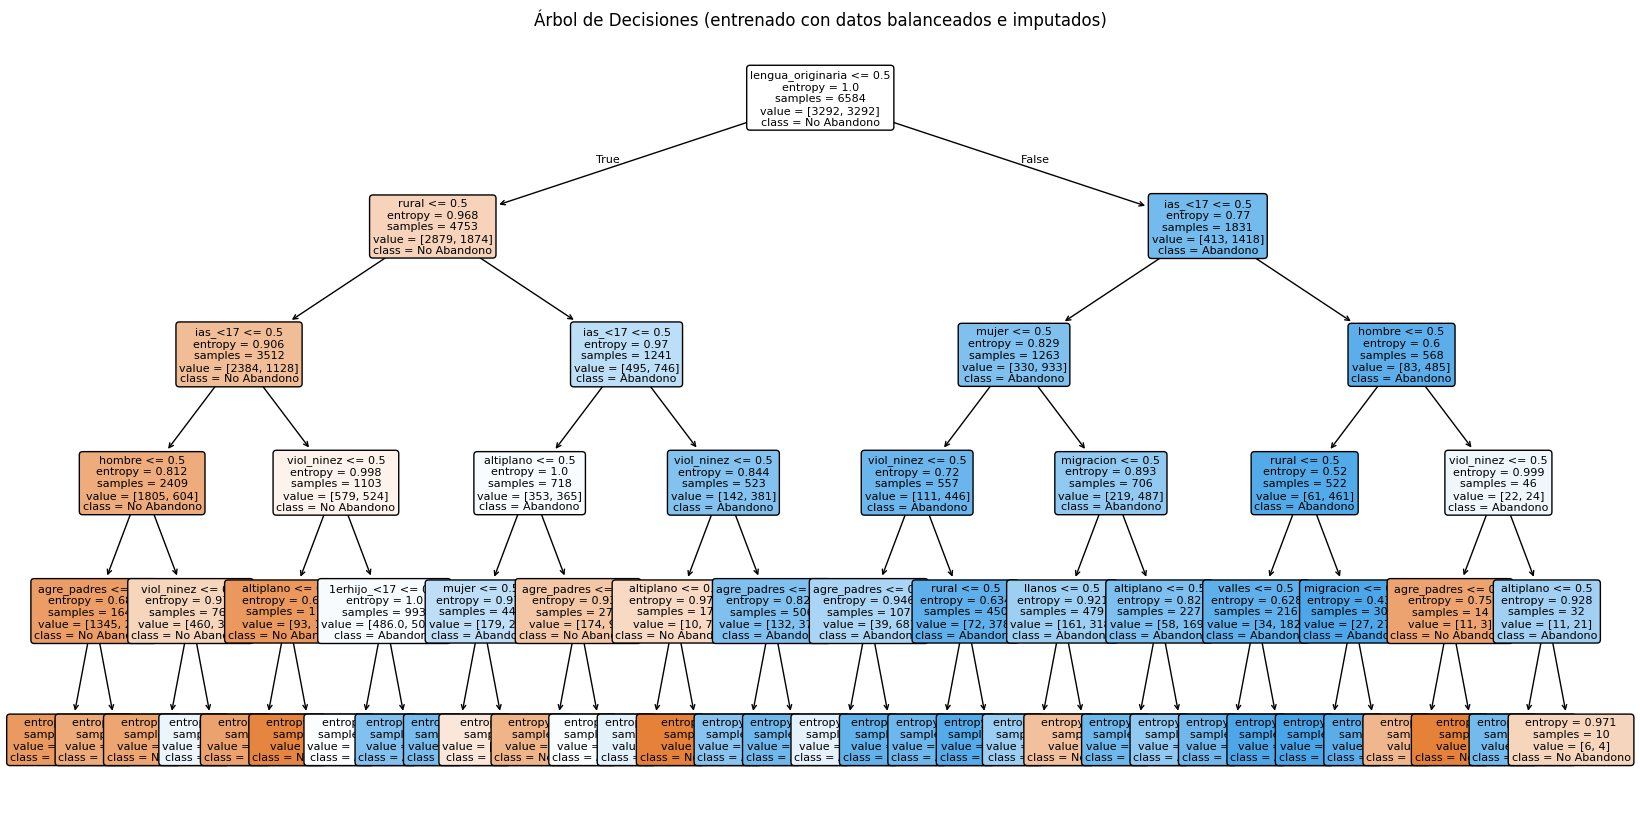

El gráfico del árbol de decisiones ha sido exportado como 'arbol_de_decisiones.png'


In [ ]:
# Configurar el tamaño de la figura
plt.figure(figsize=(20, 10))

# Visualizar el árbol
# Se pueden ajustar los parámetros como max_depth para visualizar solo una parte del árbol
plot_tree(best_dt_model, # Usamos el mejor modelo entrenado con undersampling
          feature_names=X_train_undersampled.columns.tolist(), # Usar nombres de columnas de los datos balanceados
          class_names=['No Abandono', 'Abandono'], # Ajusta los nombres de las clases si son diferentes
          filled=True,
          rounded=True,
          fontsize=8)

plt.title("Árbol de Decisiones (entrenado con datos balanceados e imputados)")

# Exportar el gráfico a un archivo (por ejemplo, PNG)
plt.savefig("arbol_de_decisiones.png", dpi=300, bbox_inches='tight')

plt.show()

print("El gráfico del árbol de decisiones ha sido exportado como 'arbol_de_decisiones.png'")

## **ÁRBOL DE DECISIONES - MODELO PREDICTIVO**

In [ ]:
def predict_abandonment_probability_dt(feature_values, model, feature_names):

    # Crear un DataFrame con los valores de entrada en el orden correcto de los atributos
    # Asegurarse de que los tipos de datos sean consistentes
    input_df = pd.DataFrame([feature_values], columns=feature_names)

    # Usar los dtypes de los datos de entrenamiento balanceados para asegurar consistencia
    input_df = input_df.astype(X_train_undersampled.dtypes)

    # Realizar la predicción de probabilidad
    # predict_proba devuelve las probabilidades para cada clase (clase 0, clase 1)
    # Queremos la probabilidad de la clase 1 (Abandono), que está en el índice 1
    probabilities = model.predict_proba(input_df)

    # Devolver la probabilidad de la clase positiva (índice 1)
    return probabilities[0][1]

# --- Ejemplo de uso ---
# Usamos los mismos datos usados con el modelo de Regresión Logísitca para comparar
example_feature_values_new_person_dt = {
    'npioc': 0,
    'agre_padres': 0,
    'viol_ninez': 0,
    'lengua_originaria': 0,
    'migracion': 0,
    'rural': 0,
    'altiplano': 1,
    'valles': 0,
    'llanos': 0,
    'hombre': 0,
    'mujer': 1,
    '1erhijo_<17': 0,
    'ias_<17': 0
}

# Obtener la lista de nombres de las características del DataFrame X_train_undersampled
# Esto asegura que el orden de las características sea el mismo que el de entrenamiento balanceado
feature_names_for_prediction_dt = X_train_undersampled.columns.tolist()

# Verificar que el diccionario de entrada tenga todas las características esperadas
if set(example_feature_values_new_person_dt.keys()) != set(feature_names_for_prediction_dt):
    print("Error: Las características de entrada no coinciden con las características del modelo.")
    print("Características esperadas:", feature_names_for_prediction_dt)
    print("Características proporcionadas:", list(example_feature_values_new_person_dt.keys()))
else:
    # Usar la función para predecir la probabilidad
    # Usamos 'best_dt_model' que es el mejor modelo encontrado en la validación inicial (ahora entrenado con undersampling)
    # Usamos 'feature_names_for_prediction_dt' para mantener el orden de las columnas
    predicted_probability_dt = predict_abandonment_probability_dt(
        example_feature_values_new_person_dt,
        best_dt_model,       # Usar el mejor modelo de Árbol de Decisiones entrenado con undersampling
        feature_names_for_prediction_dt
    )

    if predicted_probability_dt is not None:
        print(f"\nPara esta persona, la probabilidad predicha de abandono escolar según el Árbol de Decisiones es: {predicted_probability_dt:.4f}")


Para esta persona, la probabilidad predicha de abandono escolar según el Árbol de Decisiones es: 0.1605


# **NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inicializar el modelo Naive Bayes (GaussianNB es adecuado para características continuas/discretas)
gnb = GaussianNB()

# Definir el espacio de hiperparámetros para la búsqueda (GaussianNB tiene menos hiperparámetros)
# var_smoothing es un parámetro para añadir estabilidad numérica
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Inicializar GridSearchCV
# cv=5 para 5-fold cross-validation en el conjunto de entrenamiento balanceado
grid_search_nb = GridSearchCV(gnb, param_grid_nb, cv=5, scoring='accuracy', n_jobs=-1)

# Ajustar el GridSearchCV a los datos de ENTRENAMIENTO balanceados y ESCALADOS
# Usamos X_train_undersampled_scaled y y_train_undersampled
print("Realizando búsqueda de hiperparámetros para Naive Bayes en el conjunto de entrenamiento balanceado y escalado...")
grid_search_nb.fit(X_train_undersampled_scaled, y_train_undersampled)

# Mostrar los mejores hiperparámetros encontrados
print("\nMejores hiperparámetros para Naive Bayes (con undersampling):", grid_search_nb.best_params_)

# Mostrar la mejor puntuación de validación cruzada
print("Mejor puntuación de validación cruzada (con undersampling):", grid_search_nb.best_score_)

# Evaluar el mejor modelo encontrado en el conjunto de validación ESCALADO
# Usamos X_val_scaled_after_undersample y y_val
best_nb_model = grid_search_nb.best_estimator_
y_val_pred_nb = best_nb_model.predict(X_val_scaled_after_undersample)

print("\nEvaluación del MEJOR modelo de Naive Bayes (con undersampling) en el conjunto de VALIDACIÓN (escalado):")
print("Accuracy:", accuracy_score(y_val, y_val_pred_nb))
print("Classification Report:\n", classification_report(y_val, y_val_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_nb))

Realizando búsqueda de hiperparámetros para Naive Bayes en el conjunto de entrenamiento balanceado y escalado...

Mejores hiperparámetros para Naive Bayes (con undersampling): {'var_smoothing': 1e-09}
Mejor puntuación de validación cruzada (con undersampling): 0.6977539447902458

Evaluación del MEJOR modelo de Naive Bayes (con undersampling) en el conjunto de VALIDACIÓN (escalado):
Accuracy: 0.7495716034271726
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      2988
           1       0.53      0.56      0.55      1097

    accuracy                           0.75      4085
   macro avg       0.68      0.69      0.69      4085
weighted avg       0.75      0.75      0.75      4085

Confusion Matrix:
 [[2444  544]
 [ 479  618]]


In [ ]:
# Evaluar el mejor modelo de Naive Bayes (con undersampling) en el conjunto de PRUEBA ESCALADO
# Usamos best_nb_model y X_test_scaled_after_undersample
y_test_pred_nb_undersampled = best_nb_model.predict(X_test_scaled_after_undersample)

print("\nEvaluación del MEJOR modelo de Naive Bayes (con undersampling) en el conjunto de PRUEBA (escalado, desequilibrado):")
print("Accuracy:", accuracy_score(y_test, y_test_pred_nb_undersampled))
print("Classification Report:\n", classification_report(y_test, y_test_pred_nb_undersampled))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_nb_undersampled))

# Guardar las métricas de evaluación en un archivo de texto
with open("evaluacion_naive_bayes.txt", "w") as f:
    f.write("Evaluación del MEJOR modelo de Naive Bayes (con undersampling) en el conjunto de PRUEBA (escalado, desequilibrado):\n")
    f.write(f"Accuracy: {accuracy_score(y_test, y_test_pred_nb_undersampled):.4f}\n")
    f.write("Classification Report:\n")
    f.write(classification_report(y_test, y_test_pred_nb_undersampled))
    f.write("\nConfusion Matrix:\n")
    f.write(str(confusion_matrix(y_test, y_test_pred_nb_undersampled)))

print("\nLas métricas de evaluación del modelo de Naive Bayes han sido exportadas a 'evaluacion_naive_bayes.txt'")


Evaluación del MEJOR modelo de Naive Bayes (con undersampling) en el conjunto de PRUEBA (escalado, desequilibrado):
Accuracy: 0.7544675642594859
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      2988
           1       0.54      0.56      0.55      1097

    accuracy                           0.75      4085
   macro avg       0.69      0.69      0.69      4085
weighted avg       0.76      0.75      0.76      4085

Confusion Matrix:
 [[2463  525]
 [ 478  619]]

Las métricas de evaluación del modelo de Naive Bayes han sido exportadas a 'evaluacion_naive_bayes.txt'


In [ ]:
# Análisis de parámetros

# Acceder a la media (theta_) y varianza (var_) aprendidas por el modelo Naive Bayes

# best_nb_model es el mejor modelo Naive Bayes entrenado con undersampling y escalado
print("Media de las características para cada clase (0: No Abandono, 1: Abandono):")
# best_nb_model.theta_ contiene las medias para cada característica (columnas) y cada clase (filas)
# Las filas corresponden a las clases en sorted(model.classes_)
# En este caso, probablemente [0, 1]
mean_params_df = pd.DataFrame(best_nb_model.theta_, columns=X_train_undersampled.columns, index=best_nb_model.classes_)
display(mean_params_df)

print("\nVarianza de las características para cada clase (0: No Abandono, 1: Abandono):")
# best_nb_model.var_ contiene las varianzas para cada característica (columnas) y cada clase (filas)
variance_params_df = pd.DataFrame(best_nb_model.var_, columns=X_train_undersampled.columns, index=best_nb_model.classes_)
display(variance_params_df)

# También puedes ver las probabilidades a priori de cada clase
print("\nProbabilidades a priori de las clases:")
prior_prob_df = pd.DataFrame({'Clase': best_nb_model.classes_, 'Probabilidad a Priori': best_nb_model.class_prior_})
display(prior_prob_df)


print("\nInterpretación de los parámetros:")
print("- **Media (theta_):** El valor promedio de cada característica para las instancias que pertenecen a cada clase (No Abandono vs Abandono).")
print("  Por ejemplo, una media más alta para una característica en la Clase 1 (Abandono) comparada con la Clase 0 (No Abandono) sugiere que valores más altos de esa característica están asociados con el abandono.")
print("- **Varianza (var_):** Una medida de la dispersión de los valores de cada característica dentro de cada clase.")
print("  Una varianza alta indica que los valores de la característica varían mucho dentro de esa clase.")
print("- **Probabilidades a Priori (class_prior_):** La proporción de instancias de cada clase en el conjunto de entrenamiento con el que se entrenó el modelo (en este caso, el conjunto undersampled, por lo que serán ~0.5 para cada clase).")

Media de las características para cada clase (0: No Abandono, 1: Abandono):


,npioc,agre_padres,viol_ninez,lengua_originaria,migracion,rural,altiplano,valles,llanos,hombre,mujer,1erhijo_<17,ias_<17
0,-0.178556,-0.113181,-0.134577,-0.340673,-0.100215,-0.277317,0.055821,-0.067943,0.009493,-0.065087,0.065087,-0.087848,-0.18882
1,0.178556,0.113181,0.134577,0.340673,0.100215,0.277317,-0.055821,0.067943,-0.009493,0.065087,-0.065087,0.087848,0.18882



Varianza de las características para cada clase (0: No Abandono, 1: Abandono):


,npioc,agre_padres,viol_ninez,lengua_originaria,migracion,rural,altiplano,valles,llanos,hombre,mujer,1erhijo_<17,ias_<17
0,0.765094,0.898665,1.332036,0.546507,0.886236,0.740192,1.025523,0.939766,1.007536,0.938272,0.938272,0.365009,0.830740
1,1.171142,1.075715,0.631742,1.221377,1.093678,1.105999,0.968245,1.051002,0.992284,1.053256,1.053256,1.619556,1.097954



Probabilidades a priori de las clases:


,Clase,Probabilidad a Priori
0,0,0.5
1,1,0.5



Interpretación de los parámetros:
- **Media (theta_):** El valor promedio de cada característica para las instancias que pertenecen a cada clase (No Abandono vs Abandono).
  Por ejemplo, una media más alta para una característica en la Clase 1 (Abandono) comparada con la Clase 0 (No Abandono) sugiere que valores más altos de esa característica están asociados con el abandono.
- **Varianza (var_):** Una medida de la dispersión de los valores de cada característica dentro de cada clase.
  Una varianza alta indica que los valores de la característica varían mucho dentro de esa clase.
- **Probabilidades a Priori (class_prior_):** La proporción de instancias de cada clase en el conjunto de entrenamiento con el que se entrenó el modelo (en este caso, el conjunto undersampled, por lo que serán ~0.5 para cada clase).


## **NAIVE BAYES - MODELO PREDICTIVO**

In [ ]:
def predict_abandonment_probability_nb(feature_values, model, scaler, feature_names):

    # Crear un DataFrame con los valores de entrada en el orden correcto de los atributos
    # Asegurarse de que los tipos de datos sean consistentes
    input_df = pd.DataFrame([feature_values], columns=feature_names)

    # Usar los dtypes de los datos de entrenamiento balanceados para asegurar consistencia
    input_df = input_df.astype(X_train_undersampled.dtypes)

    # Preprocesar los valores de entrada: escalado para Naive Bayes
    numeric_cols = input_df.select_dtypes(include=['int64', 'float64']).columns

    # Escalar características numéricas
    try:
         # Usar el escalador ajustado en los datos undersampled y escalados
        input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    except ValueError as e:
        print(f"Error durante el escalado: {e}")
        print("Asegúrate de que todas las columnas numéricas esperadas para escalado estén en feature_values.")
        return None

    # Realizar la predicción de probabilidad
    # predict_proba devuelve las probabilidades para cada clase (clase 0, clase 1)
    # Queremos la probabilidad de la clase 1 (Abandono), que está en el índice 1
    probabilities = model.predict_proba(input_df)

    # Devolver la probabilidad de la clase positiva (índice 1)
    return probabilities[0][1]

# --- Ejemplo de uso ---
# Usamos los mismos datos usados con los modelos anteriores para comparar
example_feature_values_new_person_nb = {
    'npioc': 0,
    'agre_padres': 0,
    'viol_ninez': 0,
    'lengua_originaria': 0,
    'migracion': 0,
    'rural': 0,
    'altiplano': 1,
    'valles': 0,
    'llanos': 0,
    'hombre': 0,
    'mujer': 1,
    '1erhijo_<17': 0,
    'ias_<17': 0
}

# Obtener la lista de nombres de las características del DataFrame X_train_undersampled
# Esto asegura que el orden de las características sea el mismo que el de entrenamiento balanceado
feature_names_for_prediction_nb = X_train_undersampled.columns.tolist()

# Verificar que el diccionario de entrada tenga todas las características esperadas
if set(example_feature_values_new_person_nb.keys()) != set(feature_names_for_prediction_nb):
    print("Error: Las características de entrada no coinciden con las características del modelo.")
    print("Características esperadas:", feature_names_for_prediction_nb)
    print("Características proporcionadas:", list(example_feature_values_new_person_nb.keys()))
else:
    # Usar la función para predecir la probabilidad
    # Usamos 'best_nb_model' que es el mejor modelo encontrado en la validación
    # Usamos 'scaler_undersampled' que fue ajustado a los datos de entrenamiento balanceados y escalados
    # Usamos 'feature_names_for_prediction_nb' para mantener el orden de las columnas
    predicted_probability_nb = predict_abandonment_probability_nb(
        example_feature_values_new_person_nb,
        best_nb_model,       # Usar el mejor modelo de Naive Bayes entrenado con undersampling
        scaler_undersampled,  # Usar el escalador ajustado
        feature_names_for_prediction_nb
    )

    if predicted_probability_nb is not None:
        print(f"\nPara esta persona, la probabilidad predicha de abandono escolar según Naive Bayes es: {predicted_probability_nb:.4f}")


Para esta persona, la probabilidad predicha de abandono escolar según Naive Bayes es: 0.0004


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


# **REDES NEURONALES ARTIFICIALES (RNA)**

In [ ]:
#!pip uninstall -y tensorflow tensorflow-cpu tensorflow-intel keras keras-nightly keras-preprocessing


In [ ]:
!pip install tensorflow


import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score


# Definir la arquitectura del modelo RNA
model_rna = Sequential([
    # Capa de entrada y primera capa oculta
    # La función de activación 'relu' es común para capas ocultas
    # input_shape define la forma de los datos de entrada (número de características)
    Dense(128, activation='relu', input_shape=(X_train_undersampled_scaled.shape[1],)),
    Dropout(0.5), # Añadir Dropout para regularización

    # Segunda capa oculta
    Dense(64, activation='relu'),
    Dropout(0.5), # Añadir Dropout para regularización

    # Capa de salida
    # Para clasificación binaria, usamos una unidad con activación 'sigmoid'
    # que produce una probabilidad entre 0 y 1
    Dense(1, activation='sigmoid')
])

# Compilar el modelo
# 'binary_crossentropy' es la función de pérdida adecuada para clasificación binaria
# El optimizador 'adam' es una opción popular y eficiente
# 'accuracy' es la métrica principal para evaluar el rendimiento
model_rna.compile(optimizer=Adam(learning_rate=0.0001), # Tasa de aprendizaje reducida
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Mostrar un resumen de la arquitectura del modelo
model_rna.summary()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.4/620.4 MB 36.2 MB/s  0:00:12
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 55.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 55.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 69.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 81.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 82.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 60.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 81.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 111.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 46.7 MB/s  0:00:00
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33/33 [tensorflow]


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,113 (39.50 KB)

 Trainable params: 10,113 (39.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Entrenar el modelo RNA
# Con los datos de entrenamiento balanceados y escalados
# Usamos el conjunto de validación
history = model_rna.fit(X_train_undersampled_scaled, y_train_undersampled,
                        epochs=200, # Número de épocas
                        batch_size=128, # Tamaño del lote
                        validation_data=(X_val_scaled_after_undersample, y_val),
                        verbose=1)

Epoch 1/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.4942 - loss: 0.7460 - val_accuracy: 0.4482 - val_loss: 0.6967
Epoch 2/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5501 - loss: 0.6964 - val_accuracy: 0.6289 - val_loss: 0.6624
Epoch 3/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5767 - loss: 0.6843 - val_accuracy: 0.6688 - val_loss: 0.6420
Epoch 4/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6120 - loss: 0.6651 - val_accuracy: 0.7009 - val_loss: 0.6248
Epoch 5/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6249 - loss: 0.6530 - val_accuracy: 0.7084 - val_loss: 0.6087
Epoch 6/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6489 - loss: 0.6325 - val_accuracy: 0.7209 - val_loss: 0.5951
Epoch 7/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6585 - loss: 0.6250 - val_accuracy: 0.7204 - val_loss: 0.5851
Epoch 8/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6576 - loss: 0.6238 - val_accuracy: 0.

In [ ]:
# Evaluar el modelo RNA en el conjunto de PRUEBA
# Usamos el conjunto de prueba imputado y ESCALADO
loss, accuracy = model_rna.evaluate(X_test_scaled_after_undersample, y_test, verbose=0)

print(f"Evaluación del modelo RNA en el conjunto de PRUEBA (imputado y escalado, desequilibrado):")
print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")

# Para obtener el classification report y la confusion matrix, necesitamos las predicciones
y_test_pred_prob_rna = model_rna.predict(X_test_scaled_after_undersample)
# Las predicciones de probabilidad de la capa de salida sigmoide son para la clase positiva (1)
# Convertir probabilidades a clases binarias (0 o 1) usando un umbral (por defecto 0.5)
y_test_pred_rna = (y_test_pred_prob_rna > 0.5).astype("int32")

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_rna))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_rna))

# Guardar las métricas de evaluación en un archivo de texto
with open("evaluacion_rna.txt", "w") as f:
    f.write("Evaluación del modelo RNA en el conjunto de PRUEBA (imputado y escalado, desequilibrado):\n")
    f.write(f"Loss: {loss:.4f}\n")
    f.write(f"Accuracy: {accuracy:.4f}\n")
    f.write("\nClassification Report:\n")
    f.write(classification_report(y_test, y_test_pred_rna))
    f.write("\nConfusion Matrix:\n")
    f.write(str(confusion_matrix(y_test, y_test_pred_rna)))

print("\nLas métricas de evaluación del modelo RNA han sido exportadas a 'evaluacion_rna.txt'")

Evaluación del modelo RNA en el conjunto de PRUEBA (imputado y escalado, desequilibrado):
Loss: 0.5458
Accuracy: 0.7319
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.73      0.80      2988
           1       0.50      0.74      0.60      1097

    accuracy                           0.73      4085
   macro avg       0.69      0.73      0.70      4085
weighted avg       0.78      0.73      0.74      4085


Confusion Matrix:
[[2180  808]
 [ 287  810]]

Las métricas de evaluación del modelo RNA han sido exportadas a 'evaluacion_rna.txt'


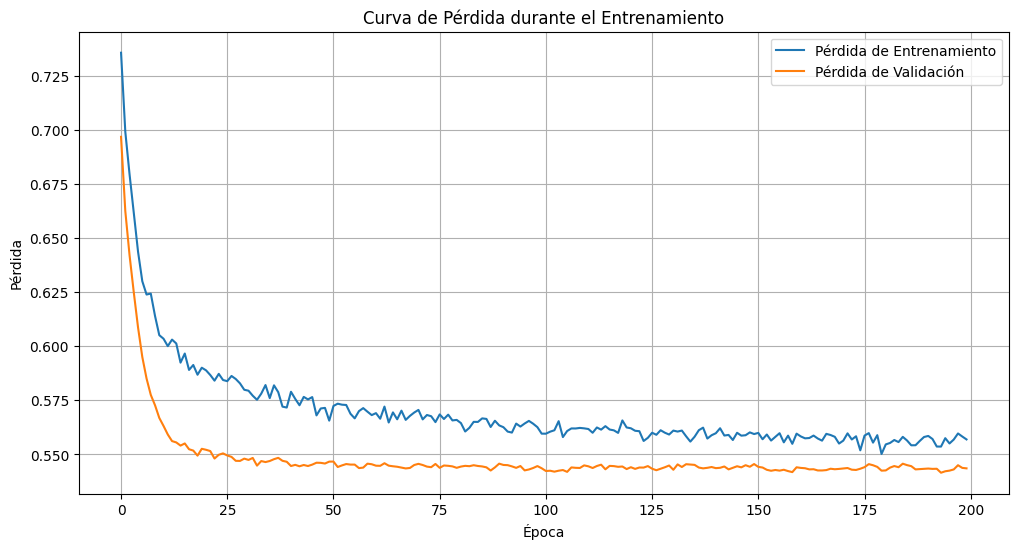

<Figure size 640x480 with 0 Axes>

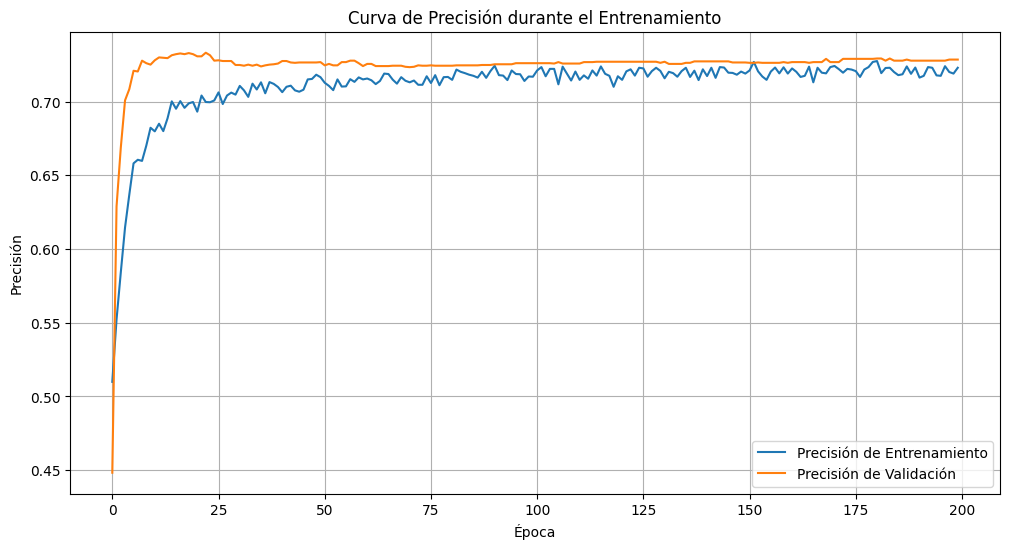


Los gráficos de pérdida y precisión han sido exportados como 'curva_perdida_rna.png' y 'curva_precision_rna.png'


<Figure size 640x480 with 0 Axes>

In [ ]:
# Graficar la pérdida de entrenamiento y validación a lo largo de las épocas
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Curva de Pérdida durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()

# Exportar el gráfico de pérdida a un archivo (por ejemplo, PNG)
plt.savefig("curva_perdida_rna.png", dpi=300, bbox_inches='tight')


# Graficar la precisión de entrenamiento y validación a lo largo de las épocas
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.title('Curva de Precisión durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()

# Exportar el gráfico de precisión a un archivo (por ejemplo, PNG)
plt.savefig("curva_precision_rna.png", dpi=300, bbox_inches='tight')

print("\nLos gráficos de pérdida y precisión han sido exportados como 'curva_perdida_rna.png' y 'curva_precision_rna.png'")

Calculando Importancia de Permutación para el modelo RNA...


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



Importancia de Permutación para el Modelo RNA:


,Atributo,Importancia Promedio,Desviación Estándar
3,lengua_originaria,0.079780,0.003261
2,viol_ninez,0.021224,0.003517
5,rural,0.020734,0.003042
12,ias_<17,0.019021,0.002532
11,1erhijo_<17,0.011579,0.000903
4,migracion,0.007711,0.001346
0,npioc,0.006781,0.001742
6,altiplano,0.003770,0.002514
1,agre_padres,0.003329,0.002201
8,llanos,0.002350,0.001470


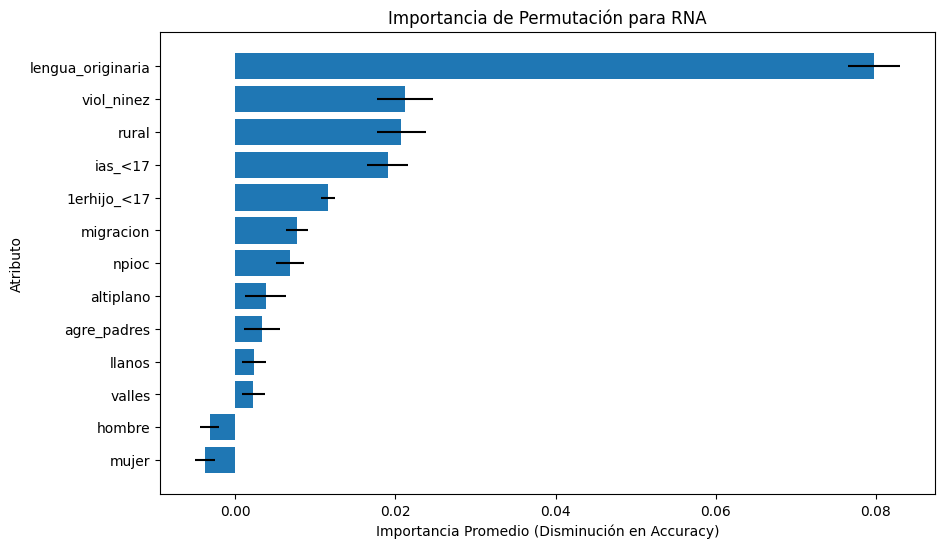

In [ ]:
print("Calculando Importancia de Permutación para el modelo RNA...")

# Definir una función de scoring personalizada que maneje la salida de probabilidad de Keras
def custom_accuracy_scorer(estimator, X, y_true):
    # Obtener las probabilidades predichas (salida del modelo Keras)
    # Asegurarse de que X esté en el formato esperado por el modelo (NumPy array escalado)
    y_pred_prob = estimator.predict(X, verbose=0)
    # Convertir probabilidades a etiquetas binarias usando un umbral (0.5)
    y_pred = (y_pred_prob > 0.5).astype("int32")
    return accuracy_score(y_true, y_pred)


# Calcular la importancia de permutación en el conjunto de PRUEBA
# Usamos X_test_scaled_after_undersample (que es un numpy array) y y_test
# n_repeats: número de veces que se permuta cada característica (para mayor robustez)
# random_state: para reproducibilidad
# n_jobs: para paralelización (-1 usa todos los núcleos disponibles)
# scoring: usar la función de scoring personalizada
result = permutation_importance(
    model_rna,                                # El modelo RNA entrenado
    X_test_scaled_after_undersample,          # El conjunto de datos de prueba (escalado como numpy array)
    y_test,                                   # Las etiquetas de prueba
    scoring=custom_accuracy_scorer,           # Usar la función de scoring personalizada
    n_repeats=10,                             # Número de repeticiones
    random_state=42,                          # Para reproducibilidad
    n_jobs=-1                                 # Usar todos los núcleos disponibles
)

# La importancia se almacena en result.importances_mean
# Obtener los nombres de las características del DataFrame original
# Usamos X_train_undersampled que tiene los nombres de las columnas correctos
feature_names = X_train_undersampled.columns

# Crear un DataFrame para visualizar los resultados
importance_df_rna = pd.DataFrame({
    'Atributo': feature_names,
    'Importancia Promedio': result.importances_mean,
    'Desviación Estándar': result.importances_std
})

# Ordenar por importancia promedio descendente
importance_df_rna = importance_df_rna.sort_values(by='Importancia Promedio', ascending=False)

print("\nImportancia de Permutación para el Modelo RNA:")
display(importance_df_rna)

# Opcional: Graficar la importancia de permutación
plt.figure(figsize=(10, 6))
plt.barh(importance_df_rna['Atributo'], importance_df_rna['Importancia Promedio'], xerr=importance_df_rna['Desviación Estándar'])
plt.xlabel('Importancia Promedio (Disminución en Accuracy)')
plt.ylabel('Atributo')
plt.title('Importancia de Permutación para RNA')
plt.gca().invert_yaxis() # Invertir el eje y para que el más importante esté arriba
plt.show()

# Opcional: Guardar la gráfica
# plt.savefig("permutation_importance_rna.png", dpi=300, bbox_inches='tight')
# print("\nLa gráfica de importancia de permutación ha sido exportada como 'permutation_importance_rna.png'")

## **RNA - MODELO PREDICTIVO**

In [ ]:
def predict_abandonment_probability_rna(feature_values, model, scaler, feature_names):

    # Crear un DataFrame con los valores de entrada en el orden correcto de los atributos
    # Asegurarse de que los tipos de datos sean consistentes
    input_df = pd.DataFrame([feature_values], columns=feature_names)
    # Usar los dtypes de los datos imputados para asegurar consistencia
    input_df = input_df.astype(X_train_undersampled.dtypes)

    # Preprocesar los valores de entrada: escalado para la RNA
    numeric_cols = input_df.select_dtypes(include=['int64', 'float64']).columns


    # Escalar características numéricas
    try:
         # Usar el escalador ajustado en los datos undersampled e imputados
        input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    except ValueError as e:
        print(f"Error durante el escalado: {e}")
        print("Asegúrate de que todas las columnas numéricas esperadas para escalado estén en feature_values.")
        return None


    # Realizar la predicción de probabilidad
    # predict devuelve las probabilidades para la clase positiva (1) directamente en este caso
    predicted_probability = model.predict(input_df)

    # La salida es un array, queremos el primer (y único) elemento
    return predicted_probability[0][0]


# --- Ejemplo de uso ---
# Usamos los mismos datos usados con los modelos anteriores para comparar
example_feature_values_new_person_rna = {
    'npioc': 0,
    'agre_padres': 0,
    'viol_ninez': 0,
    'lengua_originaria': 0,
    'migracion': 0,
    'rural': 0,
    'altiplano': 1,
    'valles': 0,
    'llanos': 0,
    'hombre': 0,
    'mujer': 1,
    '1erhijo_<17': 0,
    'ias_<17': 0
}

# Obtener la lista de nombres de las características del DataFrame X_train_undersampled_imputed
# Esto asegura que el orden de las características sea el mismo que el de entrenamiento balanceado e imputado
feature_names_for_prediction_rna = X_train_undersampled.columns.tolist()

# Verificar que el diccionario de entrada tenga todas las características esperadas
if set(example_feature_values_new_person_rna.keys()) != set(feature_names_for_prediction_rna):
    print("Error: Las características de entrada no coinciden con las características del modelo.")
    print("Características esperadas:", feature_names_for_prediction_rna)
    print("Características proporcionadas:", list(example_feature_values_new_person_rna.keys()))
else:
    # Usar la función para predecir la probabilidad
    # Usamos 'model_rna' que es el modelo de RNA entrenado
    # Usamos 'imputer_undersampled' que fue ajustado a los datos de entrenamiento balanceados
    # Usamos 'scaler_undersampled' que fue ajustado a los datos de entrenamiento balanceados e imputados
    # Usamos 'feature_names_for_prediction_rna' para mantener el orden de las columnas
    predicted_probability_rna = predict_abandonment_probability_rna(
        example_feature_values_new_person_rna,
        model_rna,       # Usar el modelo de RNA entrenado
        scaler_undersampled,  # Usar el escalador ajustado
        feature_names_for_prediction_rna
    )

    if predicted_probability_rna is not None:
        print(f"\nPara esta persona, la probabilidad predicha de abandono escolar según la RNA es: {predicted_probability_rna:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step

Para esta persona, la probabilidad predicha de abandono escolar según la RNA es: 0.1043


In [ ]:
# Exportar el DataFrame procesado a un archivo CSV
df.to_csv('dataset_procesado.csv', index=False)

print("El dataset procesado ha sido exportado como 'dataset_procesado.csv'")

El dataset procesado ha sido exportado como 'dataset_procesado.csv'


# **CROSSVALIDATION**

In [ ]:
# Comparación ampliada de modelos

from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# intentamos importar boosters externos (no obligatorios)
extra_models = {}
try:
    import xgboost as xgb
    extra_models['XGBoost'] = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1)
except Exception:
    pass

try:
    import lightgbm as lgb
    extra_models['LightGBM'] = lgb.LGBMClassifier(random_state=42, n_jobs=-1)
except Exception:
    pass

try:
    import catboost as cb
    extra_models['CatBoost'] = cb.CatBoostClassifier(verbose=0, random_state=42)
except Exception:
    pass

# Modelos base + modelos adicionales si están disponibles
models = {
    'LogisticRegression': LogisticRegression(max_iter=2000, class_weight='balanced', random_state=42, n_jobs=-1),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'GaussianNB': GaussianNB(),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVC': SVC(probability=True, random_state=42),            # probability=True para poder usar predict_proba
    'MLP': MLPClassifier(hidden_layer_sizes=(128,64), max_iter=500, random_state=42)
}

# Añadir boosters externos si se importaron correctamente
models.update(extra_models)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = []

# Asegúrate de tener X, y definidos (df con target 'Abandono' separado)
# feature_cols = [c for c in df.columns if c != 'Abandono']
# X = df[feature_cols]
# y = df['Abandono']

for name, model in models.items():
    print(f"Evaluando: {name}")
    pipe = ImbPipeline([
        ('scaler', StandardScaler()),      # ok para todos; los árboles ignoran escalado
        ('smote', SMOTE(random_state=42)),
        ('clf', model)
    ])
    # intentamos obtener probabilidades CV (para AUC)
    try:
        y_prob = cross_val_predict(pipe, X, y, cv=cv, method='predict_proba', n_jobs=-1)[:, 1]
    except Exception as e:
        # fallback: algunos estimadores/proyectos fallan; usamos predict y lo tratamos como probabilidades aproximadas
        try:
            y_pred_cv = cross_val_predict(pipe, X, y, cv=cv, method='predict', n_jobs=-1)
            # convertir predicciones 0/1 en "probabilidades" 0/1 (aproximación)
            y_prob = np.array(y_pred_cv, dtype=float)
        except Exception as e2:
            print(f"  ERROR con cross_val_predict para {name}: {e2}")
            continue

    # Umbral 0.5 para convertir a etiquetas
    y_pred = (y_prob >= 0.5).astype(int)

    # calcular métricas
    try:
        auc = roc_auc_score(y, y_prob)
    except Exception:
        auc = np.nan
    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred, zero_division=0)
    rec = recall_score(y, y_pred, zero_division=0)
    f1 = f1_score(y, y_pred, zero_division=0)

    results.append({
        'Model': name,
        'AUC': auc,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1': f1
    })

metrics_df = pd.DataFrame(results).sort_values(by='AUC', ascending=False, na_position='last')
display(metrics_df)

# Guardar resultados
metrics_df.to_csv('model_comparison_metrics_extended.csv', index=False)
print("Tabla guardada en 'model_comparison_metrics_extended.csv'")


Evaluando: LogisticRegression
Evaluando: DecisionTree
Evaluando: RandomForest
Evaluando: GradientBoosting
Evaluando: GaussianNB
Evaluando: KNN
Evaluando: SVC
Evaluando: MLP
Evaluando: XGBoost


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Evaluando: LightGBM


,Model,AUC,Accuracy,Precision,Recall,F1
3,GradientBoosting,0.795084,0.719042,0.484863,0.735691,0.584504
9,LightGBM,0.789900,0.715517,0.480430,0.724936,0.577884
0,LogisticRegression,0.782267,0.727954,0.495409,0.688480,0.576201
8,XGBoost,0.781898,0.716937,0.481765,0.710354,0.574144
7,MLP,0.778974,0.715174,0.479696,0.712723,0.573440
2,RandomForest,0.776799,0.713264,0.477284,0.708531,0.570360
1,DecisionTree,0.772913,0.711159,0.474967,0.714182,0.570513
4,GaussianNB,0.765315,0.752338,0.536707,0.570361,0.553022
6,SVC,0.748369,0.715076,0.480209,0.736420,0.581337
5,KNN,0.725312,0.740244,0.518519,0.461903,0.488576


Tabla guardada en 'model_comparison_metrics_extended.csv'


In [ ]:
# Intentar añadir boosters si están instalados (no obligatorio)
try:
    import lightgbm as lgb
    models['LightGBM'] = lgb.LGBMClassifier(random_state=42, n_jobs=-1)
except Exception:
    # print("LightGBM no disponible")
    pass

try:
    import xgboost as xgb
    models['XGBoost'] = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1)
except Exception:
    # print("XGBoost no disponible")
    pass

# Filtrar modelos no instanciados (None)
models = {k:v for k,v in models.items() if v is not None}

# Parámetros K-Fold
K = 5
kf = StratifiedKFold(n_splits=K, shuffle=True, random_state=42)

# Data holders
summary = []                    # guardará mean/std por modelo
detailed_rows = []              # guardará fila por modelo/fold (opcional para CSV)

for name, estimator in models.items():
    print(f"Evaluando modelo: {name}")
    fold_metrics = {'AUC':[], 'Accuracy':[], 'Precision':[], 'Recall':[], 'F1':[]}

    # Recorremos folds manualmente para poder aplicar SMOTE solo en el train
    for fold_index, (train_idx, test_idx) in enumerate(kf.split(X, y), start=1):
        # INDEXAR EXPLÍCITO y seguro (maneja DataFrame/Series y ndarray)
        if hasattr(X, "iloc"):  # pandas DataFrame / Series
            X_train = X.iloc[train_idx]
            X_test  = X.iloc[test_idx]
        else:                   # numpy array
            X_train = X[train_idx]
            X_test  = X[test_idx]

        if hasattr(y, "iloc"):
            y_train = y.iloc[train_idx]
            y_test  = y.iloc[test_idx]
        else:
            y_train = y[train_idx]
            y_test  = y[test_idx]

        # Escalador y SMOTE (fit sólo en train)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        sm = SMOTE(random_state=42)
        X_res, y_res = sm.fit_resample(X_train_scaled, y_train)

        # Ajustar modelo en datos sobremuestreados
        estimator.fit(X_res, y_res)

        # Obtener score para AUC
        y_score = None
        if hasattr(estimator, "predict_proba"):
            try:
                y_score = estimator.predict_proba(X_test_scaled)[:, 1]
            except Exception:
                y_score = None
        if y_score is None and hasattr(estimator, "decision_function"):
            try:
                y_score = estimator.decision_function(X_test_scaled)
            except Exception:
                y_score = None

        # Predicciones de etiquetas
        try:
            y_pred = estimator.predict(X_test_scaled)
        except Exception:
            if y_score is not None:
                y_pred = (y_score >= 0.5).astype(int)
            else:
                raise RuntimeError(f"No se puede predecir etiquetas con el estimador {name} en el fold {fold_index}")

        # Métricas
        try:
            auc_val = roc_auc_score(y_test, y_score) if y_score is not None else np.nan
        except Exception:
            auc_val = np.nan

        acc_val = accuracy_score(y_test, y_pred)
        prec_val = precision_score(y_test, y_pred, zero_division=0)
        rec_val = recall_score(y_test, y_pred, zero_division=0)
        f1_val = f1_score(y_test, y_pred, zero_division=0)

        fold_metrics['AUC'].append(auc_val)
        fold_metrics['Accuracy'].append(acc_val)
        fold_metrics['Precision'].append(prec_val)
        fold_metrics['Recall'].append(rec_val)
        fold_metrics['F1'].append(f1_val)

        detailed_rows.append({
            'Model': name,
            'Fold': fold_index,
            'AUC': auc_val,
            'Accuracy': acc_val,
            'Precision': prec_val,
            'Recall': rec_val,
            'F1': f1_val
        })

    summary.append({
        'Model': name,
        'AUC_mean': np.nanmean(fold_metrics['AUC']),
        'AUC_std': np.nanstd(fold_metrics['AUC']),
        'Accuracy_mean': np.mean(fold_metrics['Accuracy']),
        'Accuracy_std': np.std(fold_metrics['Accuracy']),
        'Precision_mean': np.mean(fold_metrics['Precision']),
        'Precision_std': np.std(fold_metrics['Precision']),
        'Recall_mean': np.mean(fold_metrics['Recall']),
        'Recall_std': np.std(fold_metrics['Recall']),
        'F1_mean': np.mean(fold_metrics['F1']),
        'F1_std': np.std(fold_metrics['F1'])
    })

# DataFrames de salida
summary_df = pd.DataFrame(summary).sort_values(by='AUC_mean', ascending=False, na_position='last')
detailed_df = pd.DataFrame(detailed_rows)

display(summary_df)
# Guardar CSVs si quieres
summary_df.to_csv('kfold_summary_by_model.csv', index=False)
detailed_df.to_csv('kfold_detailed_per_fold.csv', index=False)
print("Guardados 'kfold_summary_by_model.csv' y 'kfold_detailed_per_fold.csv'")

Evaluando modelo: LogisticRegression
Evaluando modelo: DecisionTree
Evaluando modelo: RandomForest
Evaluando modelo: GradientBoosting
Evaluando modelo: GaussianNB
Evaluando modelo: KNN
Evaluando modelo: SVC
Evaluando modelo: MLP
Evaluando modelo: XGBoost


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:01:14] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:01:14] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:01:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:01:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:01:16] WARNING: /w

Evaluando modelo: LightGBM
[LightGBM] [Info] Number of positive: 11949, number of negative: 11949
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006012 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 418
[LightGBM] [Info] Number of data points in the train set: 23898, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 11949, number of negative: 11949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.048148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 250
[LightGBM] [Info] Number of data points in the train set: 23898, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 11950, number of negative: 11950
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002481 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 267
[LightGBM] [Info] Number of data points in the train set: 23900, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 11950, number of negative: 11950
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002295 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 282
[LightGBM] [Info] Number of data points in the train set: 23900, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 11950, number of negative: 11950
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002421 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 262
[LightGBM] [Info] Number of data points in the train set: 23900, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


,Model,AUC_mean,AUC_std,Accuracy_mean,Accuracy_std,Precision_mean,Precision_std,Recall_mean,Recall_std,F1_mean,F1_std
3,GradientBoosting,0.795511,0.003351,0.719041,0.009792,0.485191,0.011549,0.735693,0.008249,0.584615,0.007703
9,LightGBM,0.790578,0.004140,0.715515,0.013006,0.481084,0.015253,0.724938,0.016988,0.578045,0.009548
0,LogisticRegression,0.782431,0.002904,0.727954,0.004378,0.495456,0.005829,0.688479,0.007495,0.576209,0.005431
8,XGBoost,0.782301,0.005037,0.716936,0.011241,0.482281,0.013617,0.710355,0.015932,0.574255,0.008568
7,MLP,0.779147,0.005565,0.715173,0.008890,0.479971,0.010618,0.712726,0.009836,0.573519,0.007349
2,RandomForest,0.777077,0.004800,0.713263,0.009525,0.477640,0.011142,0.708532,0.013113,0.570438,0.007031
1,DecisionTree,0.773104,0.004808,0.714536,0.011119,0.479011,0.013259,0.697776,0.014461,0.567815,0.007952
4,GaussianNB,0.765583,0.002926,0.752338,0.003602,0.536826,0.006906,0.570360,0.009042,0.553012,0.004826
6,SVC,0.749388,0.016686,0.714977,0.007635,0.480333,0.008838,0.737149,0.017828,0.581494,0.007215
5,KNN,0.725174,0.013516,0.740244,0.013822,0.519736,0.030558,0.461899,0.024662,0.488601,0.022065


Guardados 'kfold_summary_by_model.csv' y 'kfold_detailed_per_fold.csv'


# **Optimización de hiperparámetros**

### Optimización Regresión Logística

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Definir el espacio de hiperparámetros para la búsqueda
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['liblinear', 'saga'],
}

# Inicializar el modelo de Regresión Logística
# Usamos class_weight='balanced' porque estamos entrenando en datos balanceados con undersampling
logistic_regression = LogisticRegression(random_state=42, class_weight='balanced')


# Inicializar GridSearchCV
# cv=5 para 5-fold cross-validation en el conjunto de entrenamiento balanceado y escalado
# scoring='accuracy' es una métrica inicial, pero considera 'roc_auc' o 'f1' para problemas de desbalance
grid_search_lr = GridSearchCV(logistic_regression, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)

# Ajustar el GridSearchCV a los datos de entrenamiento balanceados y escalados
# Usamos X_train_undersampled_scaled y y_train_undersampled
print("Realizando búsqueda de hiperparámetros para Regresión Logística en el conjunto de entrenamiento balanceado...")
grid_search_lr.fit(X_train_undersampled_scaled, y_train_undersampled)

# Mostrar los mejores hiperparámetros encontrados
print("\nMejores hiperparámetros para Regresión Logística (con undersampling):", grid_search_lr.best_params_)

# Mostrar la mejor puntuación de validación cruzada en el conjunto de entrenamiento balanceado
print("Mejor puntuación de validación cruzada (con undersampling):", grid_search_lr.best_score_)

# Evaluar el mejor modelo encontrado en el conjunto de validación
# Usamos X_val_scaled_after_undersample y y_val
best_model_lr_undersampled_tuned = grid_search_lr.best_estimator_
y_val_pred_lr_tuned = best_model_lr_undersampled_tuned.predict(X_val_scaled_after_undersample)

print("\nEvaluación del mejor modelo de Regresión Logística SINTONIZADO (con undersampling) en el conjunto de VALIDACIÓN (escalado):")
print("Accuracy:", accuracy_score(y_val, y_val_pred_lr_tuned))
print("Classification Report:\n", classification_report(y_val, y_val_pred_lr_tuned))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_lr_tuned))

Realizando búsqueda de hiperparámetros para Regresión Logística en el conjunto de entrenamiento balanceado...

Mejores hiperparámetros para Regresión Logística (con undersampling): {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Mejor puntuación de validación cruzada (con undersampling): 0.7129422815508213

Evaluación del mejor modelo de Regresión Logística SINTONIZADO (con undersampling) en el conjunto de VALIDACIÓN (escalado):
Accuracy: 0.7223990208078336
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.73      0.79      2988
           1       0.49      0.70      0.57      1097

    accuracy                           0.72      4085
   macro avg       0.68      0.71      0.68      4085
weighted avg       0.77      0.72      0.73      4085

Confusion Matrix:
 [[2188  800]
 [ 334  763]]


### Optimización Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Definir el espacio de hiperparámetros para la búsqueda para Random Forest
# class_weight='balanced' puede ayudar a manejar el desbalance de clases
param_grid_rf = {
    'n_estimators': [100, 200, 300], # Número de árboles en el bosque
    'max_depth': [None, 10, 20, 30], # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10], # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 2, 4],   # Número mínimo de muestras requeridas en un nodo hoja
    'criterion': ['gini', 'entropy'], # Función para medir la calidad de una división
    # 'class_weight': ['balanced'] # Descomentar si quieres probar con class_weight='balanced'
}

# Inicializar el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1) # n_jobs=-1 usa todos los núcleos disponibles


# Inicializar GridSearchCV
# cv=5 para 5-fold cross-validation en el conjunto de entrenamiento balanceado
# scoring='accuracy' es una métrica inicial, considera 'roc_auc' o 'f1' para problemas de desbalance
# n_jobs=-1 para usar todos los núcleos disponibles
# verbose para ver el progreso: 0=nada, 1=tiempo total, 2=folds, 3=folds+params
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Ajustar el GridSearchCV a los datos de entrenamiento balanceados
# Usamos X_train_undersampled y y_train_undersampled (Random Forest no necesita escalado)
print("Realizando búsqueda de hiperparámetros para Random Forest en el conjunto de entrenamiento balanceado...")
grid_search_rf.fit(X_train_undersampled, y_train_undersampled)

# Mostrar los mejores hiperparámetros encontrados
print("\nMejores hiperparámetros para Random Forest (con undersampling):", grid_search_rf.best_params_)

# Mostrar la mejor puntuación de validación cruzada en el conjunto de entrenamiento balanceado
print("Mejor puntuación de validación cruzada (con undersampling):", grid_search_rf.best_score_)

# Evaluar el mejor modelo encontrado en el conjunto de validación
# Usamos X_val y y_val (Random Forest no necesita escalado)
best_model_rf_undersampled_tuned = grid_search_rf.best_estimator_
y_val_pred_rf_tuned = best_model_rf_undersampled_tuned.predict(X_val)

print("\nEvaluación del mejor modelo de Random Forest SINTONIZADO (con undersampling) en el conjunto de VALIDACIÓN:")
print("Accuracy:", accuracy_score(y_val, y_val_pred_rf_tuned))
print("Classification Report:\n", classification_report(y_val, y_val_pred_rf_tuned))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_rf_tuned))

Realizando búsqueda de hiperparámetros para Random Forest en el conjunto de entrenamiento balanceado...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Mejores hiperparámetros para Random Forest (con undersampling): {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Mejor puntuación de validación cruzada (con undersampling): 0.717648681146476

Evaluación del mejor modelo de Random Forest SINTONIZADO (con undersampling) en el conjunto de VALIDACIÓN:
Accuracy: 0.7253365973072216
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.72      0.79      2988
           1       0.49      0.74      0.59      1097

    accuracy                           0.73      4085
   macro avg       0.69      0.73      0.69      4085
weighted avg       0.78      0.73      0.74      4085

Confusion Matrix:
 [[2151  837]
 [ 285  812]]


# **Stacking**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split # Importar train_test_split
from sklearn.preprocessing import StandardScaler # Importar StandardScaler
import numpy as np # Importar numpy

# Definir modelos base
base_models = [
    ('lr', LogisticRegression(random_state=42, max_iter=1000)),
    ('svc', SVC(probability=True, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=200, random_state=42))
]

# Modelo meta
meta_model = LogisticRegression(random_state=42, max_iter=1000)

# Crear el stacking classifier
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1,
    passthrough=False # Mantener passthrough=False ya que estamos escalando explícitamente
)

# Re-obtener los conjuntos de entrenamiento y prueba para asegurar consistencia en el tamaño del test set
X_train_initial, X_test_recheck, y_train_initial, y_test_recheck = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Escalar el conjunto de prueba re-obtenido usando el scaler ajustado en los datos undersampled/scaled
X_test_scaled_recheck = scaler_undersampled.transform(X_test_recheck)


# Entrenamiento del StackingClassifier con datos balanceados y escalados
stacking_clf.fit(X_train_undersampled_scaled, y_train_undersampled)


# Evaluación en conjunto de validación (con el conjunto de validación escalado previamente)
y_val_pred_stack = stacking_clf.predict(X_val_scaled_after_undersample)
y_val_proba_stack = stacking_clf.predict_proba(X_val_scaled_after_undersample)[:, 1]

print("===== Evaluación STACKING (Validación) =====")
print("Accuracy:", accuracy_score(y_val, y_val_pred_stack))
print("AUC:", roc_auc_score(y_val, y_val_proba_stack))
print("Classification Report:\n", classification_report(y_val, y_val_pred_stack))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_stack))


# Evaluación en conjunto de prueba
# Usamos los conjuntos de prueba re-obtenidos y escalados (X_test_scaled_recheck, y_test_recheck)
y_test_pred_stack = stacking_clf.predict(X_test_scaled_recheck)
y_test_proba_stack = stacking_clf.predict_proba(X_test_scaled_recheck)[:, 1]

print("\n===== Evaluación STACKING (Prueba) =====")
print("Accuracy:", accuracy_score(y_test_recheck, y_test_pred_stack)) # Usar y_test_recheck
print("AUC:", roc_auc_score(y_test_recheck, y_test_proba_stack)) # Usar y_test_recheck
print("Classification Report:\n", classification_report(y_test_recheck, y_test_pred_stack)) # Usar y_test_recheck
print("Confusion Matrix:\n", confusion_matrix(y_test_recheck, y_test_pred_stack)) # Usar y_test_recheck

# Guardar métricas
with open("evaluacion_stacking.txt", "w") as f:
    f.write("Evaluación del modelo STACKING (LogReg + SVC + RF) en el conjunto de prueba:\n")
    f.write(f"Accuracy: {accuracy_score(y_test_recheck, y_test_pred_stack):.4f}\n") # Usar y_test_recheck
    f.write(f"AUC: {roc_auc_score(y_test_recheck, y_test_proba_stack):.4f}\n") # Usar y_test_recheck
    f.write("Classification Report:\n")
    f.write(classification_report(y_test_recheck, y_test_pred_stack)) # Usar y_test_recheck
    f.write("\nConfusion Matrix:\n")
    f.write(str(confusion_matrix(y_test_recheck, y_test_pred_stack))) # Usar y_test_recheck

===== Evaluación STACKING (Validación) =====
Accuracy: 0.7314565483476132
AUC: 0.7952049766980409
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.74      0.80      2988
           1       0.50      0.70      0.58      1097

    accuracy                           0.73      4085
   macro avg       0.69      0.72      0.69      4085
weighted avg       0.77      0.73      0.74      4085

Confusion Matrix:
 [[2215  773]
 [ 324  773]]

===== Evaluación STACKING (Prueba) =====
Accuracy: 0.7356181150550796
AUC: 0.7918233249009407
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.75      0.81      2988
           1       0.51      0.70      0.59      1097

    accuracy                           0.74      4085
   macro avg       0.69      0.72      0.70      4085
weighted avg       0.77      0.74      0.75      4085

Confusion Matrix:
 [[2240  748]
 [ 332  765]]


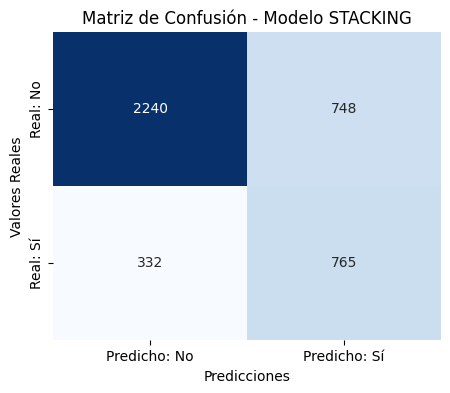

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcular la matriz (por si no la tienes guardada aún)
cm = confusion_matrix(y_test_recheck, y_test_pred_stack)

# Dibujar con seaborn
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicho: No', 'Predicho: Sí'],
            yticklabels=['Real: No', 'Real: Sí'])

plt.title('Matriz de Confusión - Modelo STACKING')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

In [ ]:
stacking_clf.estimators_        # lista de modelos base ya entrenados
stacking_clf.final_estimator_   # meta-modelo ya entrenado (LogisticRegression)

# retorna las predicciones (probabilidades/clases) que usa el meta-modelo
meta_features_val = stacking_clf.transform(X_val_scaled_after_undersample)
meta_features_val.shape  # (n_samples, n_base_models * n_output_por_model)


(4085, 3)

In [ ]:
coef = stacking_clf.final_estimator_.coef_
intercept = stacking_clf.final_estimator_.intercept_
print("Coef meta-modelo:", coef)


Coef meta-modelo: [[2.79273075 0.42831151 1.53876625]]


# Nueva predicción

In [ ]:
nueva_muestra = {
    'npioc': 0,
    'agre_padres': 0,
    'viol_ninez': 1,
    'lengua_originaria': 0,
    'migracion': 1,
    'rural': 0,
    'altiplano': 0,
    'valles': 1,
    'llanos': 0,
    'hombre': 1,
    'mujer': 0,
    '1erhijo_<17': 0,
    'ias_<17': 0
}

# Convertir el diccionario a DataFrame (1 fila)
fila_nueva = pd.DataFrame([nueva_muestra])

# Asegurar que las columnas estén en el mismo orden que X
fila_nueva = fila_nueva[X.columns]

# Escalar con el mismo scaler usado en el entrenamiento
fila_nueva_scaled = scaler_undersampled.transform(fila_nueva)

# Predecir la clase
prediccion = stacking_clf.predict(fila_nueva_scaled)

# Obtener la probabilidad de la clase positiva
probabilidad = stacking_clf.predict_proba(fila_nueva_scaled)[:, 1]

# Mostrar resultados
print("Predicción:", int(prediccion[0]))
print("Probabilidad de clase positiva:", probabilidad[0])



Predicción: 0
Probabilidad de clase positiva: 0.3787298723391751
